# Support Vector Machine

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

# Loading Iris Dataset

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# SVC

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

0.9736842105263158

# Grid Search

In [ ]:
clf=SVC()
params = {'kernel':['linear','rbf','poly'], 'C':[0.00001,0.0001,0.001,0.01,0.1],'degree':[1,2,3,4,5]}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf_gs=GridSearchCV(clf,param_grid=params,cv=5)
clf_gs.fit(X_train,y_train);

In [ ]:
print('Best Parameters : ',clf_gs.best_params_)
print('Best Score : ',clf_gs.best_score_)

Best Parameters :  {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
Best Score :  0.9553359683794467


In [ ]:
import pandas as pd
x=pd.DataFrame(clf_gs.cv_results_)
x=x[["params","mean_test_score"]]

In [ ]:
x

,params,mean_test_score
0,"{'C': 1e-05, 'degree': 1, 'kernel': 'linear'}",0.348221
1,"{'C': 1e-05, 'degree': 1, 'kernel': 'rbf'}",0.348221
2,"{'C': 1e-05, 'degree': 1, 'kernel': 'poly'}",0.348221
3,"{'C': 1e-05, 'degree': 2, 'kernel': 'linear'}",0.348221
4,"{'C': 1e-05, 'degree': 2, 'kernel': 'rbf'}",0.348221
...,...,...
70,"{'C': 0.1, 'degree': 4, 'kernel': 'rbf'}",0.882609
71,"{'C': 0.1, 'degree': 4, 'kernel': 'poly'}",0.955336
72,"{'C': 0.1, 'degree': 5, 'kernel': 'linear'}",0.937945
73,"{'C': 0.1, 'degree': 5, 'kernel': 'rbf'}",0.882609


# Learning Curve

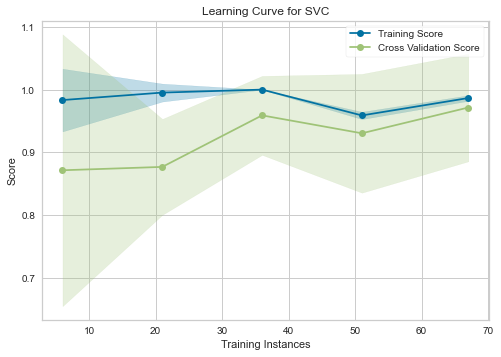

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for SVC'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10, estimator=SVC(), scoring='accuracy')


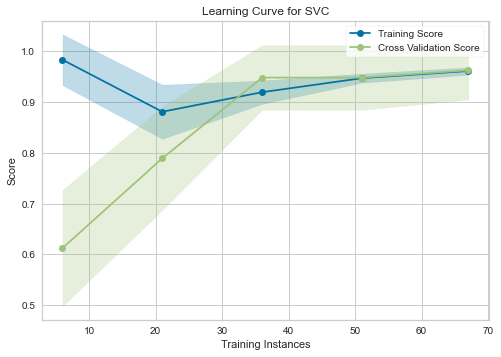

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for SVC'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10, estimator=SVC(), scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import learning_curve
print(learning_curve(model, X_train, y_train, cv=10, scoring='accuracy'))
print(learning_curve(model, X_test, y_test, cv=10, scoring='accuracy'))

**Support Vector Classification and Regression with Grid Search for Hyper-parameter tuning For wine Data Set**

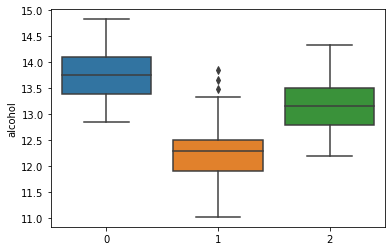

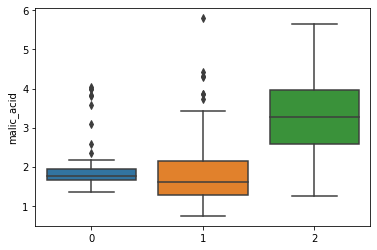

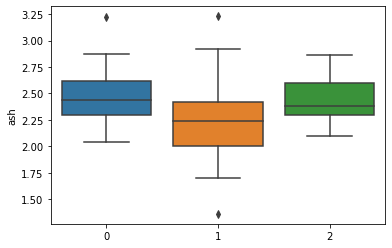

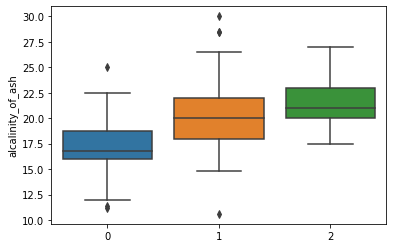

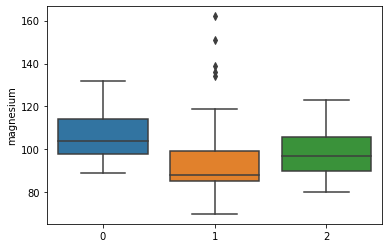

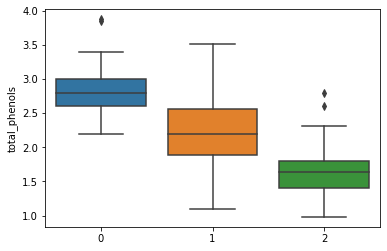

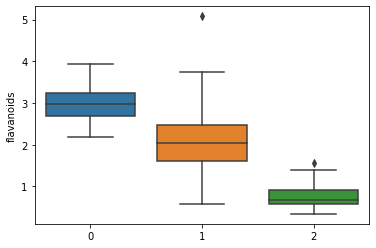

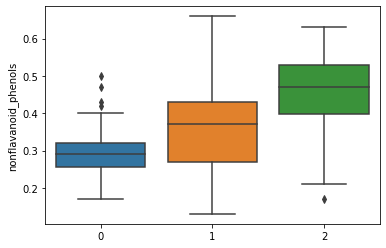

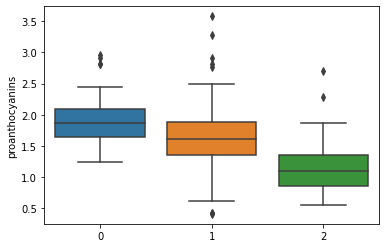

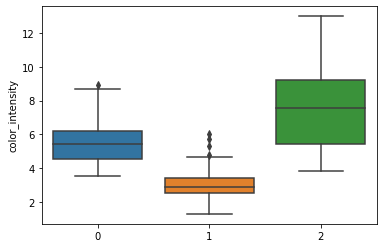

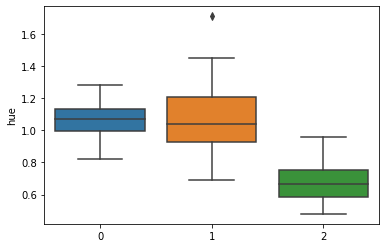

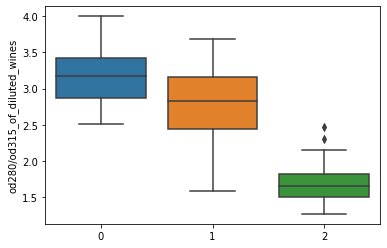

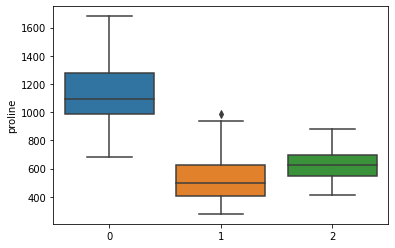

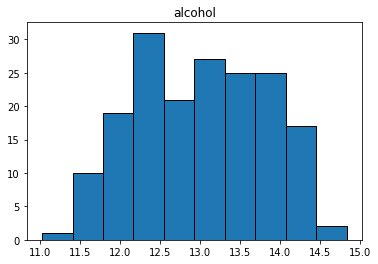

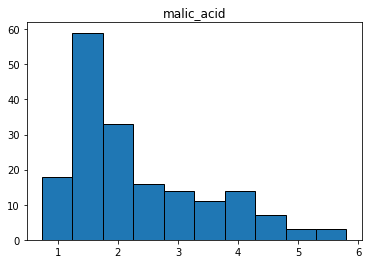

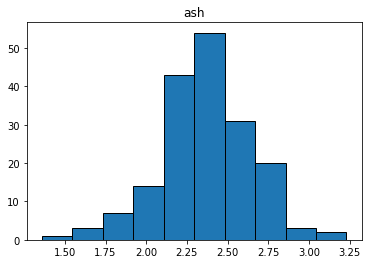

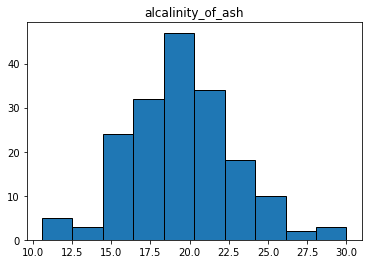

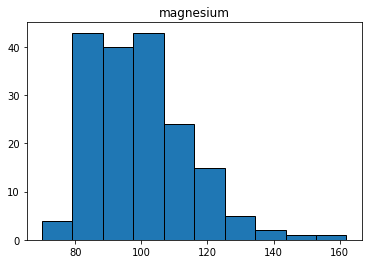

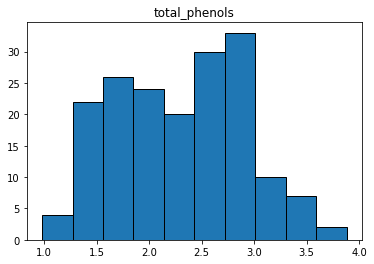

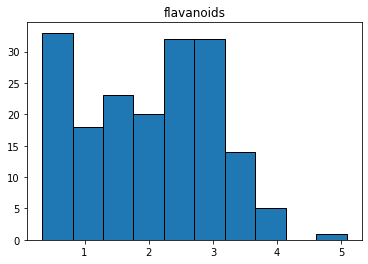

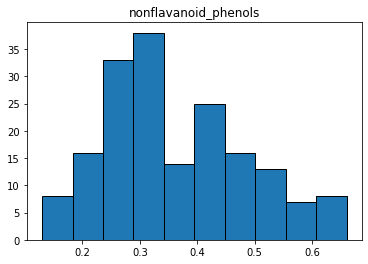

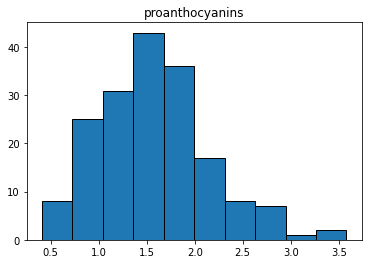

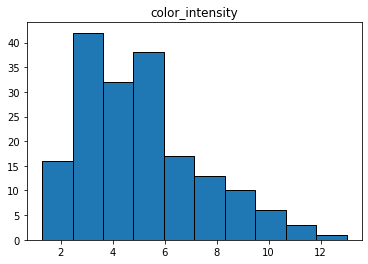

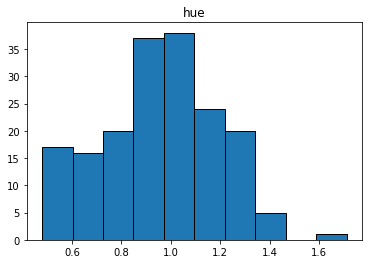

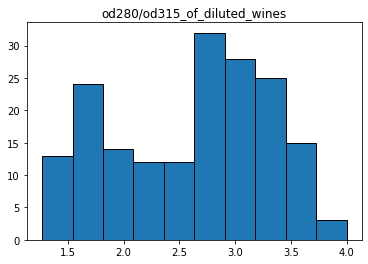

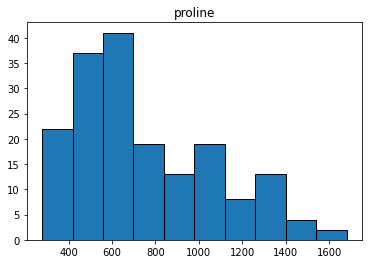

For Kernel:  linear
Accuracy is : 0.9074074074074074
For Kernel:  rbf
Accuracy is : 0.6296296296296297
For Kernel:  poly
Accuracy is : 0.6296296296296297
For Kernel:  sigmoid
Accuracy is : 0.2962962962962963
Accuracy on test data is: 0.6296296296296297
Accuracy on train data is: 0.6693548387096774
Accuracy on test data is: 0.6296296296296297
Accuracy on train data is: 0.6935483870967742
Accuracy on test data is: 0.6296296296296297
Accuracy on train data is: 0.6935483870967742
Accuracy on test data is: 0.6296296296296297
Accuracy on train data is: 0.6935483870967742
Accuracy on test data is: 0.6296296296296297
Accuracy on train data is: 0.6935483870967742
Accuracy on test data is: 0.6296296296296297
Accuracy on train data is: 0.6935483870967742
Accuracy on test data is: 0.6296296296296297
Accuracy on train data is: 0.6935483870967742
Accuracy on test data is: 0.6296296296296297
Accuracy on train data is: 0.6935483870967742
Accuracy on test data is: 0.6296296296296297
Accuracy on train d

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

wine=load_wine()

X=wine.data
y=wine.target

features=wine.feature_names

for i in range(13):
  sns.boxplot(x=y,y=X[:,i])
  plt.ylabel(features[i])
  plt.show()

for i in range(13):
  plt.hist(X[:,i],edgecolor='black')
  plt.title(features[i])
  plt.show()

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=32)

kernel=['linear','rbf','poly','sigmoid']

for i in kernel:
  model=SVC (kernel=i, C=1.0)
  model.fit(X_train, y_train)
  print ('For Kernel: ',i)
  print ('Accuracy is :',model.score(X_test, y_test))

model=SVC()
model.fit(X_train, y_train)

print('Accuracy on test data is:', model.score(X_test, y_test))
print('Accuracy on train data is:', model.score(X_train, y_train))

for i in range(1,10):
  model=SVC(kernel='poly' ,degree=1, C=100)
  model.fit(X_train, y_train)
  print('Accuracy on test data is:', model.score(X_test, y_test))
  print('Accuracy on train data is:', model.score(X_train, y_train))

param_grid={'C': [0.1,1,10,100],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}

grid=GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.score(X_test, y_test))